In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
import plotly.graph_objs as go

Reading Files

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/research/Fake-Final.csv')
real = pd.read_csv('/content/drive/MyDrive/research/Authentic-10K.csv')

Data Cleaning

In [ ]:
frames = [fake, real]

df = pd.concat(frames)

In [ ]:
df

,Unnamed: 0,F-type,articleID,category,content,date,domain,headline,label,relation,source
0,0,Satire,1,International,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",2019-03-14T13:34:14+00:00,channeldhaka.news,মুরগির হামলায় শেয়াল নিহত,0,Unrelated,Reporter
1,1,Satire,2,Miscellaneous,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...","সেম্বর ১৭, ২০১৮",earki.com,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,0,Unrelated,Reporter
2,2,Satire,3,Miscellaneous,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",earki.com,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,0,Unrelated,Reporter
3,3,Satire,4,Sports,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,2018-06-30T15:56:47+00:00,channeldhaka.news,অবসর নেয়ার ঘোষণা দিলেন মেসি !,0,Unrelated,Reporter
4,4,Satire,5,Miscellaneous,"নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",2013-03-05T21:55:45+00:00,motikontho.wordpress.com,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...",0,Unrelated,Reporter
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,NaN,12573,Entertainment,"♦ গোলাপজলে আছে অ্যান্টি অক্সিডেন্ট, য...",2018-09-24 02:14:06,kalerkantho.com,ত্বকের বন্ধু গোলাপজল,1,NaN,NaN
9996,9996,NaN,12574,Entertainment,ঘরের পুরনো আসবাবের সঙ্গে মিশে থাকে নানা স্মৃতি...,2018-09-24 02:14:01,kalerkantho.com,ওল্ড ইজ গোল্ড,1,NaN,NaN
9997,9997,NaN,12575,Entertainment,"ধনেপাতার পাকোড়া উপকরণ ধনেপাতা ১ আঁটি, ময়দা আধা...",2018-09-24 03:26:17,kalerkantho.com,ধন্যি ধনেপাতা,1,NaN,NaN
9998,9998,NaN,12576,Entertainment,ফিট থাকতে যা যা করা দরকার তার সব করে উঠতে পারি...,2018-09-24 02:14:08,kalerkantho.com,ফাস্ট ফুড এড়িয়ে চলি,1,NaN,NaN


removing urls

In [ ]:
df_sub=df.groupby(['category', 'label'])['content'].count()

In [ ]:
df_sub

category       label
Crime          0          43
               1         144
Editorial      1         673
Education      0          30
               1         181
Entertainment  0         112
               1         551
Finance        0           3
               1         236
International  0         134
               1        1392
Lifestyle      0         108
               1         176
Miscellaneous  0         663
               1         444
National       0         152
               1        3814
Politics       0         100
               1         644
Sports         0          60
               1        1600
Technology     0          29
               1         145
Name: content, dtype: int64

In [ ]:
df_sub = df_sub.unstack().fillna(0)
df_sub

label,0,1
category,,
Crime,43.0,144.0
Editorial,0.0,673.0
Education,30.0,181.0
Entertainment,112.0,551.0
Finance,3.0,236.0
International,134.0,1392.0
Lifestyle,108.0,176.0
Miscellaneous,663.0,444.0
National,152.0,3814.0


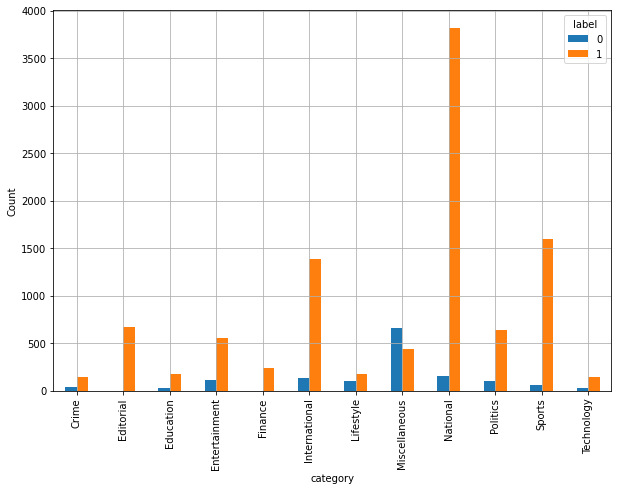

In [ ]:
# Visualize this data in bar plot
ax = (df_sub).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

Now it can be said that true news is from subjects like politicsNews and worldnews.

In [ ]:
df_sub['Count']=df_sub[0]+df_sub[1]

Pie chart for Subjects

In [ ]:
import plotly.graph_objects as go

labels = df_sub.index
values = df_sub['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

In [ ]:
df_=df.copy()

In [ ]:
df_1=df_[df_['label']==1]

In [ ]:
df_1=df_1.groupby(['date'])['label'].count()

In [ ]:
df_1=pd.DataFrame(df_1)

In [ ]:
df_1['label']

date
2018-09-19 17:48:18    1
2018-09-19 17:48:19    1
2018-09-19 17:48:20    1
2018-09-19 17:48:21    2
2018-09-19 17:48:23    2
                      ..
2018-09-29 17:37:48    1
2018-09-29 17:37:51    1
2018-09-29 17:37:54    1
2018-09-29 17:37:56    1
2018-09-29 17:37:59    1
Name: label, Length: 8384, dtype: int64

In [ ]:
df_0=df_[df_['label']==0]

In [ ]:
df_0=df_0.groupby(['date'])['label'].count()

In [ ]:
df_0=pd.DataFrame(df_0)

Day-wise count of Fake and Real News

In [ ]:
plot_data = [
    go.Scatter(
        x=df_0.index,
        y=df_0['label'],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=df_1.index,
        y=df_1['label'],
        name='Fake'
    )
    
]
plot_layout = go.Layout(
        title='Day-wise',
        yaxis_title='Count',
        xaxis_title='Time',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

 tag cloud (word cloud or wordle or weighted list in visual design) is a novelty visual representation of text data, typically used to depict keyword metadata (tags) on websites, or to visualize free form text. Tags are usually single words, and the importance of each tag is shown with font size or color.

Word Cloud for Fake news

Word Cloud for Real News

Combining 'Subject', 'title' and 'text' into one column.

In [ ]:
df_['news']=df_['category']+' '+df_['headline']+' '+df_['content']

In [ ]:
df_['news'] = df_.apply(lambda x: x['news'].lower(),axis=1)

In [ ]:
df_["news"] = df_['news'].str.replace(r'[\u09E6-\u09EF]','')

In [ ]:
all_news=pd.DataFrame(pd.Series(' '.join(df_['news']).split()).value_counts())

In [ ]:
allnews1=all_news.head(30)

Top 30 most frequently occuring words

In [ ]:
plot_data = [
    go.Bar(
        x=allnews1.index,
        y=allnews1[0],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = allnews1[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 words',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
fake_news=pd.DataFrame(pd.Series(' '.join(df_[df_['label']==1]['news']).split()).value_counts())

In [ ]:
fake_news30=fake_news.head(15)

Top 30 most Frequently occuring words from Fake news

In [ ]:
plot_data = [
    go.Bar(
        x=fake_news30.index,
        y=fake_news30[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = fake_news30[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 15 words from Fake news',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Top 30 most Frequently occuring words from True news

In [ ]:
real_news=pd.DataFrame(pd.Series(' '.join(df_[df_['label']==0]['news']).split()).value_counts())

In [ ]:
real_news30=real_news.head(15)

In [ ]:
plot_data = [
    go.Bar(
        x=real_news30.index,
        y=real_news30[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = real_news30[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 15 words from Real news',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams

In [ ]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

Finding N-grams:

In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus.

In [ ]:
import nltk
nltk.download('stopwords')
stopWords = []
with open('/content/drive/MyDrive/research/bengali', 'r', encoding="utf8") as f:
    for row in f:  # iterate over the rows in the file
        row = row.replace("\n", "")
        stopWords.append(row)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install bnltk

In [ ]:
!pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-h0bpgz_s/banglakit-lemmatizer
  Running command git clone -q https://github.com/banglakit/lemmatizer.git /tmp/pip-install-h0bpgz_s/banglakit-lemmatizer
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-cp37-none-any.whl size=117717 sha256=07df18d5519d5560117cb34b4f8aa9610fdb1855dff21d6d2a21ca5de333e1a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-yblbvnh2/wheels/55/76/fb/67135871b310a3abeb998cd696c64d8e9c495f2f33ce2e2e59
Successfully built banglakit-lemmatizer


In [ ]:
from bnltk.stemmer import BanglaStemmer
from banglakit.lemmatizer import BengaliLemmatizer

In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
 # wnl = nltk.stem.WordNetLemmatizer()
  lemmatizer = BengaliLemmatizer()
  #stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[\u09E6-\u09EF]', '', text).split()
  return [lemmatizer.lemmatize(word) for word in words if word not in stopWords]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
words = basic_clean(''.join(str(df_['news'].tolist())))

Bi-grams for news

Finding top 30 most frequent Bi-grams

In [ ]:
bigram_all=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]

In [ ]:
bigram_all=pd.DataFrame(bigram_all)
bigram_all

,0
"(কর, হয়ছ)",3741
"(তন, বলন)",3394
"(কর, হব)",2929
"(আওয়ম, লগর)",2691
"(সধরণ, সমপদক)",2055
"(উদধর, কর)",1951
"(শর, কর)",1706
"(আওয়ম, লগ)",1590
"(কজ, কর)",1521
"(শখ, হসন)",1430


In [ ]:
bg_a=bigram_all.copy()

In [ ]:
bg_a['in']=bg_a.index

In [ ]:
bg_a['in'] = bg_a.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=bg_a['in'],
        y=bg_a[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bigrams from News',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams

In [ ]:
trigram_all=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]

In [ ]:
trigram_all=pd.DataFrame(trigram_all)

In [ ]:
trigram_all

,0
"(পরধনমনতর, শখ, হসন)",774
"(বলদশ, সময়, ঘণট)",752
"(সময়, ঘণট, সপটমবর)",748
"(সকব, আল, হসন)",657
"(নজমল, হসন, শনত)",535
"(লগর, সধরণ, সমপদক)",507
"(আওয়ম, লগর, সধরণ)",452
"(জতয়, ঐকয, পরকরয়র)",438
"(এসব, কথ, বলন)",434
"(থনর, ভরপরপত, করমকরত)",428


In [ ]:
trigram_all['in']=trigram_all.index

In [ ]:
trigram_all['in'] = trigram_all.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
trigram_all

,0,in
"(পরধনমনতর, শখ, হসন)",774,"(পরধনমনতর, শখ, হসন)"
"(বলদশ, সময়, ঘণট)",752,"(বলদশ, সময়, ঘণট)"
"(সময়, ঘণট, সপটমবর)",748,"(সময়, ঘণট, সপটমবর)"
"(সকব, আল, হসন)",657,"(সকব, আল, হসন)"
"(নজমল, হসন, শনত)",535,"(নজমল, হসন, শনত)"
"(লগর, সধরণ, সমপদক)",507,"(লগর, সধরণ, সমপদক)"
"(আওয়ম, লগর, সধরণ)",452,"(আওয়ম, লগর, সধরণ)"
"(জতয়, ঐকয, পরকরয়র)",438,"(জতয়, ঐকয, পরকরয়র)"
"(এসব, কথ, বলন)",434,"(এসব, কথ, বলন)"
"(থনর, ভরপরপত, করমকরত)",428,"(থনর, ভরপরপত, করমকরত)"


In [ ]:
plot_data = [
    go.Bar(
        x=trigram_all['in'],
        y=trigram_all[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 trigrams from News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
fake_words = basic_clean(''.join(str(df_[df_['label']==1]['news'].tolist())))

Finding top 30 most frequent Bi-grams from Fake News

In [ ]:
bigram_fake=(pd.Series(nltk.ngrams(fake_words, 2)).value_counts())[:30]

In [ ]:
bigram_fake=pd.DataFrame(bigram_fake)

In [ ]:
bigram_fake

,0
"(কর, হয়ছ)",3595
"(তন, বলন)",3064
"(কর, হব)",2699
"(আওয়ম, লগর)",2652
"(সধরণ, সমপদক)",2027
"(উদধর, কর)",1904
"(আওয়ম, লগ)",1559
"(শর, কর)",1448
"(কজ, কর)",1333
"(টর, দক)",1264


In [ ]:
bigram_fake['in']=bigram_fake.index

In [ ]:
bigram_fake['in'] = bigram_fake.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=bigram_fake['in'],
        y=bigram_fake[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bi-grams from Fake News',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams from Fake News

In [ ]:
trigram_fake=(pd.Series(nltk.ngrams(fake_words, 3)).value_counts())[:30]

In [ ]:
trigram_fake=pd.DataFrame(trigram_fake)
trigram_fake

,0
"(বলদশ, সময়, ঘণট)",752
"(সময়, ঘণট, সপটমবর)",748
"(পরধনমনতর, শখ, হসন)",711
"(সকব, আল, হসন)",646
"(নজমল, হসন, শনত)",535
"(লগর, সধরণ, সমপদক)",503
"(আওয়ম, লগর, সধরণ)",450
"(জতয়, ঐকয, পরকরয়র)",438
"(এসব, কথ, বলন)",428
"(থনর, ভরপরপত, করমকরত)",414


In [ ]:
trigram_fake['in']=trigram_fake.index

In [ ]:
trigram_fake['in'] = trigram_fake.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=trigram_fake['in'],
        y=trigram_fake[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 tri-grams from Fake News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
true_words = basic_clean(''.join(str(df_[df_['label']==0]['news'].tolist())))

Finding top 30 most frequent Bi-grams from True News

In [ ]:
bigram_true=(pd.Series(nltk.ngrams(true_words, 2)).value_counts())[:30]

In [ ]:
bigram_true=pd.DataFrame(bigram_true)

In [ ]:
bigram_true

,0
"(তন, বলন)",330
"(শর, কর)",258
"(কর, হব)",230
"(কথ, বল)",209
"(দনক, মতকণঠ)",192
"(কজ, কর)",188
"(bengal, beats)",181
"(ন, কর)",170
"(শখ, হসন)",167
"(কর, তন)",167


In [ ]:
bigram_true['in']=bigram_true.index

In [ ]:
bigram_true['in'] = bigram_true.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=bigram_true['in'],
        y=bigram_true[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bi-grams from True News',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams from Fake News

In [ ]:
trigram_true=(pd.Series(nltk.ngrams(true_words, 3)).value_counts())[:30]

In [ ]:
trigram_true=pd.DataFrame(trigram_true)

In [ ]:
trigram_true

,0
"(দনক, মতকণঠ, নজসব)",105
"(এক, সবদ, সমমলন)",80
"(ইসলমর, বএনপ, শখর)",78
"(কর, তন, বলন)",65
"(পরধনমনতর, শখ, হসন)",63
"(বহততর, জময়ত, ইসলমর)",60
"(থক, শর, কর)",58
"(সথ, কথ, বল)",57
"(দবতয়, সর, পরধনমনতর)",54
"(বশবর, দবতয়, সর)",52


In [ ]:
trigram_true['in']=trigram_true.index

In [ ]:
trigram_true['in'] = trigram_true.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=trigram_true['in'],
        y=trigram_true[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 tri-grams from True News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

word2vec:
1. Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
y = df_['Target'].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df_["news"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

#del data

In [ ]:
import gensim

In [ ]:
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

231254

In [ ]:
w2v_model["trump"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([ 2.05531   , -2.9617028 , -0.7854825 , -0.36760744,  2.5336046 ,
       -1.3119483 , -0.7589394 ,  3.2057965 ,  0.1616122 ,  0.9899191 ,
       -1.139112  , -0.6119352 ,  1.4914436 ,  0.44842985, -0.38352597,
       -0.87395966,  0.49283966,  1.1461942 , -0.33340964,  2.4295132 ,
       -1.3891916 ,  1.3449106 ,  3.0899277 ,  0.5718505 , -3.1736355 ,
       -1.090971  , -0.6791416 ,  2.7994847 , -2.6523933 ,  0.5865085 ,
        1.7795277 ,  3.2398965 , -0.14617823,  1.2354126 ,  0.9874784 ,
       -2.6415813 ,  0.3468768 ,  4.6719813 , -0.79333   ,  0.2865809 ,
        2.8682742 , -1.4315444 ,  3.194748  , -0.8396188 , -1.218459  ,
        2.3892548 , -0.75866735,  0.15856436, -0.00538783,  2.499257  ,
       -0.20314474,  2.6480231 ,  0.293052  , -0.771929  ,  1.9668466 ,
       -1.4990216 ,  1.0806785 ,  0.7811126 ,  1.8484061 , -2.917542  ,
       -0.6708054 , -2.2725556 , -0.06927612, -0.24091387, -1.9859134 ,
        0.59784406, -0.812095  ,  1.4159677 , -0.265973  , -0.22

Finding most similar words using word2vec

In [ ]:
w2v_model.wv.most_similar("trump")

[('trumps', 0.8000591993331909),
 ('presidentelect', 0.6066080331802368),
 ('laughterhe', 0.5507999658584595),
 ('obama', 0.534212589263916),
 ('trumpit', 0.5314359664916992),
 ('trumptrump', 0.5156477689743042),
 ('trumpcorum', 0.5091930627822876),
 ('course', 0.5083441734313965),
 ('expectit', 0.5014913082122803),
 ('rumsfeldfeatured', 0.5005301237106323)]

In [ ]:
w2v_model.wv.most_similar("obama")

[('obamas', 0.8376255631446838),
 ('obamathe', 0.7918360233306885),
 ('obamadespite', 0.7455167174339294),
 ('obama1', 0.7390596866607666),
 ('protesterswas', 0.7383507490158081),
 ('obamamaher', 0.7325221300125122),
 ('obamawe', 0.7289390563964844),
 ('obamaof', 0.7069481611251831),
 ('checkhouser', 0.7064477801322937),
 ('obamaking', 0.7022935152053833)]

In [ ]:
w2v_model.wv.most_similar("news")

[('newshaving', 0.6766164302825928),
 ('newswatch', 0.6709648370742798),
 ('newsthe', 0.6664431691169739),
 ('staci', 0.66457200050354),
 ('newsmeanwhile', 0.6431114673614502),
 ('newsjames', 0.6362629532814026),
 ('newssorry', 0.6233739852905273),
 ('newstrump', 0.6186249256134033),
 ('nr4n1i601l', 0.6179841756820679),
 ('detroitimage', 0.6153886318206787)]

Modeling (To Detect Fake news)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_['news'], 
                                                    df_['Target'], 
                                                    random_state=0)

Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

In [ ]:
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<33666x200716 sparse matrix of type '<class 'numpy.int64'>'
	with 7219466 stored elements in Compressed Sparse Row format>

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9984860149632885


AUC is 0.9984 which means this model is a good fit.

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[5345    8]
 [   9 5860]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5353
           1       1.00      1.00      1.00      5869

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

Confusion Matrix

Text(0.5, 15.0, 'predictions')

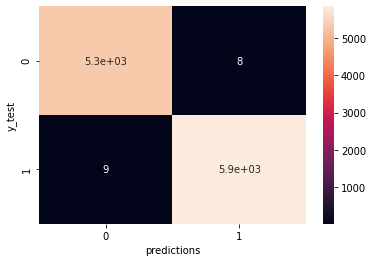

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [ ]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['reuters' 'politicsnews' 'worldnews' 'trumps' 'said' 'washington'
 'thursday' 'wednesday' 'saying' 'im']

Largest Coefs: 
['politics' 'leftnews' 'video' 'via' 'news' 'breaking' 're' 'image' 'just'
 'wire']


Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
vectorizer = CountVectorizer() 
X_train_transformed = vectorizer.fit_transform(X_train) 
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1) 
clf.fit(X_train_transformed, y_train)

y_predicted = clf.predict(X_test_transformed)

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_predicted))

AUC:  0.9740169553464733


Confusion Matrix

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))

[[5239  114]
 [ 180 5689]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5353
           1       0.98      0.97      0.97      5869

    accuracy                           0.97     11222
   macro avg       0.97      0.97      0.97     11222
weighted avg       0.97      0.97      0.97     11222



Text(0.5, 15.0, 'predictions')

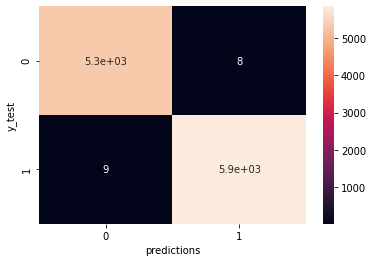

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

Using TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

41313

Logistic Regression

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9922925367503718


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[5317   36]
 [  51 5818]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5353
           1       0.99      0.99      0.99      5869

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



Confsion Matrix

In [ ]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

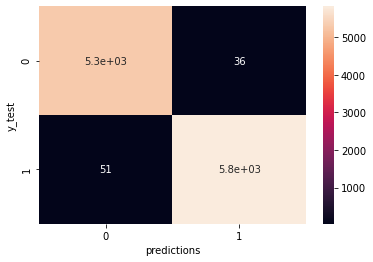

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['grafting' 'mcx' 'afghaniamerican' 'vicars' 'purists' 'revolverthe'
 'beghal' 'djamel' 'benghalem' 'amimour']

Largest tfidf: 
['county' 'scotusblog' 'npr' 'na' 'merriamwebster' 'steyn' 'igorvolsky'
 'morneau' 'hastert' 'electors']


In [ ]:

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['said' 'reuters' 'politicsnews' 'worldnews' 'on' 'trumps' 'in' 'us' 'its'
 'republican']

Largest Coefs: 
['politics' 'video' 'leftnews' 'news' 'via' 'this' 'that' 'is' 'just'
 'obama']


Multinomial Naive Bayes

In [ ]:
vectorizer = TfidfVectorizer(min_df=3)
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_transformed, y_train)

# y_predicted_prob = clf.predict_proba(X_test_transformed)[:, 1]
y_predicted = clf.predict(X_test_transformed)

In [ ]:
print('AUC: ', roc_auc_score(y_test, y_predicted))

AUC:  0.9550946808418196


In [ ]:
print(metrics.confusion_matrix(y_test, y_predicted, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_predicted, labels=[0, 1]))

[[5103  250]
 [ 253 5616]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5353
           1       0.96      0.96      0.96      5869

    accuracy                           0.96     11222
   macro avg       0.96      0.96      0.96     11222
weighted avg       0.96      0.96      0.96     11222



In [ ]:
cm = confusion_matrix(y_test, y_predicted , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

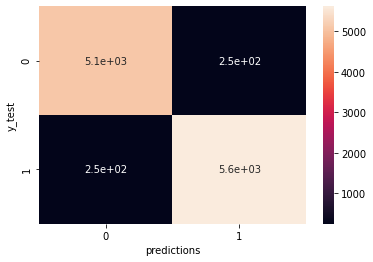

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

N-gram Analysis

In [ ]:
#ngrams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

347894

Logistic Regression

In [ ]:

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AUC:  0.9985547839963239


In [ ]:
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[5343   10]
 [   6 5863]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5353
           1       1.00      1.00      1.00      5869

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



In [ ]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

Text(0.5, 15.0, 'predictions')

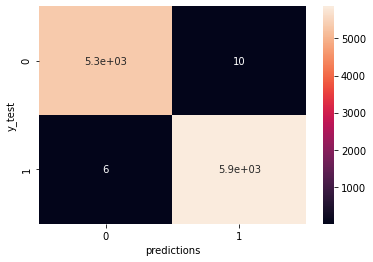

In [ ]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

In [ ]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['reuters' 'politicsnews' 'worldnews' 'washington reuters' 'said'
 'reuters the' 'said on' 'trumps' 'on tuesday' 'on wednesday']

Largest Coefs: 
['politics' 'leftnews' 'video' 'government news' 'via' 'news' 'breaking'
 'just' 'hillary' 'watch']


Now the winner is Logistic Regression with n-gram range 1, 2 for the detection of fake news.